<a href="https://colab.research.google.com/github/GabrielVogel/Implementa-es/blob/master/Gradient_Descent_with_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch as t
from sklearn.datasets import fetch_california_housing

In [4]:
X,y = fetch_california_housing(return_X_y=True)
X = t.from_numpy(X.astype(np.float32))
y = t.from_numpy(y.astype(np.float32))

In [0]:
D = X.shape[1]
N = X.shape[0]
K = 1

In [0]:
dims = [D,64,K] 

In [0]:
def forwardProp(X,W,b):
  return t.relu(t.mm(X,W)+b)

In [0]:
def ForwardPropagation(X,params):
  L = len(params) // 2
  Al_1 = X
  for l in range(1,L):
    Al = forwardProp(Al_1,params["W"+str(l)],params["b"+str(l)])
    Al_1 = Al

  pred = t.mm(Al_1,params["W"+str(L)])+params["b"+str(L)]
  return pred

In [0]:
def MSE(y,y_pred):

  return t.mean((y - y_pred)**2)

In [0]:
def Params(dims):
    params ={}
    
    for l in range(len(dims)-1):
      Xavier = t.Tensor([1 / np.sqrt(dims[l+1])])
      params["W"+str(l+1)] = t.autograd.Variable(t.randn(size = (dims[l],dims[l+1])) * Xavier, requires_grad = True)
      params["b"+str(l+1)] = t.autograd.Variable(t.zeros((dims[l+1])), requires_grad = True)

    return params

In [0]:
def ReturnGrads(params):
  L = len(params) // 2
  grads = {}
  
  for l in range(1,L+1):
    grads["W"+str(l)] = params["W"+str(l)].grad.data
    grads["b"+str(l)] = params["b"+str(l)].grad.data

  return grads

In [0]:
def InitializeVelocity(L):
  velocity = {}
  for l in range(1,L+1):
    velocity["W"+str(l)] = t.Tensor(t.zeros_like(params["W"+str(l)]))
    velocity["b"+str(l)] = t.Tensor(t.zeros_like(params["b"+str(l)]))

  return velocity

In [0]:
def UpdateParamsMomentum(grads, params,learning_rate,velocity,beta,epoch,decay):
  L = len(params) // 2
  
  ##vdW = beta * vdW + (1 - beta)*dW
  ##vdb = beta * vdb + (1 - beta)*db

  ##dW = dW - learning_rate * vdW
  ## db = db - learning_rate * vdb
  
  for l in range(1,L+1):
    velocity["W"+str(l)] = beta * velocity["W"+str(l)].data + (1 - beta) * grads["W"+str(l)].data
    velocity["b"+str(l)] = beta * velocity["b"+str(l)].data + (1 - beta) * grads["b"+str(l)].data
  

  lr = LearningRateDecay(learning_rate, epoch,decay)

  for l in range(1,L+1):
    params["W"+str(l)].data -= learning_rate * velocity["W"+str(l)].data
    params["b"+str(l)].data -= learning_rate * velocity["b"+str(l)].data

In [0]:
def LearningRateDecay(alpha_zero,epoch,decay_rate):
  return alpha_zero / (1 + epoch * decay_rate)

In [0]:
def UpdateParamsRMSprop(grads, params,learning_rate,velocity,beta,epoch,decay):

  L = len(params) // 2
  
  ##vdW = beta * vdW + (1 - beta)*dW
  ##vdb = beta * vdb + (1 - beta)*db

  ##dW = dW - learning_rate * vdW
  ## db = db - learning_rate * vdb
  
  for l in range(1,L+1):
    velocity["W"+str(l)] = beta * velocity["W"+str(l)].data + (1 - beta) * t.pow(grads["W"+str(l)].data,2)
    velocity["b"+str(l)] = beta * velocity["b"+str(l)].data + (1 - beta) * t.pow(grads["b"+str(l)].data,2)

  
  lr = LearningRateDecay(learning_rate, epoch,decay)


  for l in range(1,L+1):
    params["W"+str(l)].data -= lr * grads["W"+str(l)] / t.sqrt(velocity["W"+str(l)])
    params["b"+str(l)].data -= lr * grads["b"+str(l)] / t.sqrt(velocity["b"+str(l)])

In [16]:
learning_rate = t.Tensor([10e-7])
beta = t.Tensor([0.95])
losses = []


params = Params(dims)
L = len(params) // 2
Velocity = InitializeVelocity(L)
epochs = 600
for epoch in range(epochs):

  pred = ForwardPropagation(X[:1000],params)
  loss = MSE(y[:1000],pred)
  
  losses.append(loss.data)
  if epoch % (epochs / 10) == 0:
    print(f'Epoch {epoch}: {loss.data}')


  loss.backward()

  grads = ReturnGrads(params)
  #UpdateParams(grads,params,learning_rate,Velocity,beta)
  UpdateParamsMomentum(grads,params,learning_rate,Velocity,beta,epoch+1,decay= 0.1)
  for l in range(1,L+1):
    grads["W"+str(l)].zero_()
    grads["b"+str(l)].zero_()
  ##w1.grad.data.zero_()
  ##w2.grad.data.zero_()

Epoch 0: 2037773.375
Epoch 60: 6.316925048828125
Epoch 120: 5.862767219543457
Epoch 180: 5.66239595413208
Epoch 240: 5.5532050132751465
Epoch 300: 5.486491680145264
Epoch 360: 5.441487789154053
Epoch 420: 5.406464099884033
Epoch 480: 5.378352165222168
Epoch 540: 5.354550361633301


In [0]:
import matplotlib.pyplot as plt 

In [18]:
losses[-1]

tensor(5.3338)

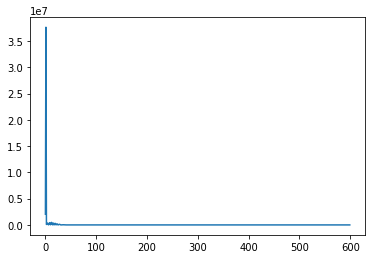

In [19]:
plt.plot(losses)